# 자동차 리콜 데이터 분석

---

## 프로젝트 목표
- 한국교통안전공단 자동차 결함 리콜 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 자동차 리콜 데이터를 불러오고 Dataframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제:** 결측치 확인 및 기초적인 데이터 변형<br>
    2.1. 결측치 확인<br>
    2.2. 중복값 확인<br>
    2.3. 기초적인 데이터 변형<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 제조사별 리콜 현황 출력<br>
    3.2. 모델별 리콜 현황 출력<br>
    3.3. 월별 리콜 현황 출력<br>
    3.4. 생산연도별 리콜 현황 출력<br>
    3.5. 4분기 제조사별 리콜 현황 출력<br>
    3.6. 하반기 생산연도별 리콜 현황 출력<br>
    3.7. 워드 클라우드를 이용한 리콜 사유 시각화<br>

---

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

---

## 프로젝트 개요

리콜(recall)은 제품의 설계, 제조 단계에서 결함이 발견되었을 시 문제 예방의 차원에서 판매자가 무상으로 수리, 점검 및 교환을 해주는 소비자 보호 제도입니다. 집집마다 개인용 자동차를 보유하게 되면서 자동차는 어느덧 우리 삶의 일상재가 되었지만, 안전성에 대해서는 산발적인 문제 제기가 계속되고 있고, 이에 따라 전격적인 자동차 리콜 사태도 종종 발생하여 화제를 모으곤 합니다.

이번 프로젝트에서는 한국교통안전공단에서 제공한 2022년 자동차 결함 리콜 데이터를 활용하여 유의미한 패턴 및 인사이트를 발굴하고 시각화하는 실습을 진행하도록 하겠습니다.

---

## 1. 데이터 읽기

필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

### 1.1. 데이터 불러오기

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.

df = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv', encoding='euc_kr')


In [8]:
# 상위 5개 데이터를 출력합니다.
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [9]:
# 상위 10개 데이터를 출력합니다.
df.head(10)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
5,폭스바겐그룹코리아 주식회사,Golf 1.6 TDI BMT,2010-07-02,2012-10-01,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
6,메르세데스벤츠코리아(주),GLC 220 d 4MATIC,2020-08-06,2020-08-06,2022-01-07,크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
7,메르세데스벤츠코리아(주),E 220 d 4MATIC,2020-08-26,2020-08-26,2022-01-07,크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
8,메르세데스벤츠코리아(주),GLE 350 e 4MATIC Coupe,2020-03-25,2021-01-26,2022-01-07,연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...
9,메르세데스벤츠코리아(주),GLE 350 e 4MATIC,2020-03-27,2021-01-25,2022-01-07,연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...


In [10]:
# 하위 5개 데이터를 출력합니다.
df.tail()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
1418,화창상사(주),CHIEF VINTAGE,2019-08-02,2020-06-04,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [13]:
# dataframe 정보를 요약하여 출력합니다. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1419 non-null   object
 1   차명        1419 non-null   object
 2   생산기간(부터)  1419 non-null   object
 3   생산기간(까지)  1419 non-null   object
 4   리콜개시일     1419 non-null   object
 5   리콜사유      1419 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB


```
1.관측치 수는? 1419
2.컬럼수는 ? 6
3.결측치는? 0
4.중복행은? X 모름
5.각 피처의 타입은 적절한가? 생산기간(부터), 생산기간(까지), 리콜개시일 날짜타입이 더 적절하지 않을까?
```

In [15]:
df.describe()  # 기초 통계 정보 파악 -수치형 데이터의 경우

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
count,1419,1419,1419,1419,1419,1419
unique,36,728,933,911,134,265
top,비엠더블유코리아(주),328i,2020-07-21,2021-09-16,2022-08-26,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
freq,432,25,14,10,101,149


---

## 2. 데이터 정제

데이터를 읽고 확인했다면 결측값(missing data), 중복값(duplicates)을 처리하고 열 이름 변경과 같은 기초적인 데이터 변형을 진행해봅시다.

### 2.1. 결측치 확인

`isnull()` 함수를 이용하여 결측치를 확인해봅시다.

In [20]:
# 각 열 별로 결측치의 갯수를 반환합니다. (True:1, False:0)
df.isnull()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1414,False,False,False,False,False,False
1415,False,False,False,False,False,False
1416,False,False,False,False,False,False
1417,False,False,False,False,False,False


In [21]:
# 컬럼별 결측치 파악
df.isnull().sum() 

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

### 2.2. 중복값 확인

`duplicated()` 함수를 이용하여 중복값을 확인해봅시다.

In [24]:
df[df.duplicated(keep=False)] # true인 행들만 출력

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
303,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
304,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
392,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
393,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
527,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
528,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1217,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


`drop_duplicates()` 함수를 이용하여 중복값을 제거합니다.

In [25]:
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))

Before: 1419
After: 1414


### 2.3. 기초적인 데이터 변형

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1414 non-null   object
 1   차명        1414 non-null   object
 2   생산기간(부터)  1414 non-null   object
 3   생산기간(까지)  1414 non-null   object
 4   리콜개시일     1414 non-null   object
 5   리콜사유      1414 non-null   object
dtypes: object(6)
memory usage: 77.3+ KB


In [35]:
# 생산기간(부터) 컬럼을 종료_년, 종료_월, 종료_일 컬럼으로 분해

df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'])

# 분석에 용이하도록 만들기 위해서 파생시킴
df['생산_년'] = df['생산기간(부터)'].dt.year          
df['생산_월'] = df['생산기간(부터)'].dt.month
df['생산_일'] = df['생산기간(부터)'].dt.day


C:\Users\hlmj3\AppData\Local\Temp\ipykernel_19168\2516549503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'])
C:\Users\hlmj3\AppData\Local\Temp\ipykernel_19168\2516549503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['생산_년'] = df['생산기간(부터)'].dt.year
C:\Users\hlmj3\AppData\Local\Temp\ipykernel_19168\2516549503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [31]:
df['생산기간(부터)'] # 원본이 바뀜

0      2021-04-29
1      2014-11-17
2      2014-11-05
3      2011-02-28
4      2014-12-19
          ...    
1414   2021-11-22
1415   2021-11-23
1416   2020-02-11
1417   2019-10-28
1418   2019-08-02
Name: 생산기간(부터), Length: 1414, dtype: datetime64[ns]

In [34]:
df.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,생산_년,생산_월,생산_일
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   제작자       1414 non-null   object        
 1   차명        1414 non-null   object        
 2   생산기간(부터)  1414 non-null   datetime64[ns]
 3   생산기간(까지)  1414 non-null   object        
 4   리콜개시일     1414 non-null   object        
 5   리콜사유      1414 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 77.3+ KB


In [38]:
# 생산기간(까지) 컬럼을 종료_년, 종료_월, 종료_일 컬럼으로 분해
df['생산기간(까지)'] = pd.to_datetime(df['생산기간(까지)'])

df['종료_년'] = df['생산기간(까지)'].dt.year          
df['종료_월'] = df['생산기간(까지)'].dt.month
df['종료_일'] = df['생산기간(까지)'].dt.day



# 리콜개시일 컬럼을 리콜_년, 리콜_월, 리콜_일 컬럼으로 분해
df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])

df['리콜_년'] = df['리콜개시일'].dt.year          
df['리콜_월'] = df['리콜개시일'].dt.month
df['리콜_일'] = df['리콜개시일'].dt.day


C:\Users\hlmj3\AppData\Local\Temp\ipykernel_19168\1753882466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['생산기간(까지)'] = pd.to_datetime(df['생산기간(까지)'])
C:\Users\hlmj3\AppData\Local\Temp\ipykernel_19168\1753882466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['종료_년'] = df['생산기간(까지)'].dt.year
C:\Users\hlmj3\AppData\Local\Temp\ipykernel_19168\1753882466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [46]:
# 불필요한 열은 버림('생산기간(부터)', '생산기간(까지)', '리콜개시일')

df.drop(columns=['생산기간(부터)', '생산기간(까지)', '리콜개시일'], inplace=True) # inplace=True: 원본 직접 수정

KeyError: "['생산기간(부터)', '생산기간(까지)', '리콜개시일'] not found in axis"

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 0 to 1418
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1414 non-null   object
 1   차명      1414 non-null   object
 2   리콜사유    1414 non-null   object
 3   생산_년    1414 non-null   int32 
 4   생산_월    1414 non-null   int32 
 5   생산_일    1414 non-null   int32 
 6   종료_년    1414 non-null   int32 
 7   종료_월    1414 non-null   int32 
 8   종료_일    1414 non-null   int32 
 9   리콜_년    1414 non-null   int32 
 10  리콜_월    1414 non-null   int32 
 11  리콜_일    1414 non-null   int32 
dtypes: int32(9), object(3)
memory usage: 126.2+ KB


본 분석에서는 2022년의 데이터만을 대상으로하므로, 그 외의 데이터가 있다면 삭제해주겠습니다.

In [54]:
# 리콜_년 피처에 2022년만 있는지 체크
df['리콜_년'].unique()

array([2022])

In [55]:
df['리콜_년'].value_counts()

리콜_년
2022    1414
Name: count, dtype: int64

---

## 3. 데이터 시각화

각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아봅시다.

In [56]:
df.head()

,제작자,차명,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,혼다코리아(주),CBR1000RR-R,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5,2015,2,26,2022,1,5
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2011,2,28,2012,9,25,2022,1,5
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,12,19,2015,2,26,2022,1,5


### 3.1. 제조사별 리콜 현황 출력

제조사별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

In [58]:
df['제작자'].unique()

array(['혼다코리아(주)', '폭스바겐그룹코리아 주식회사', '메르세데스벤츠코리아(주)', '비엠더블유코리아(주)',
       '만트럭버스코리아(주)', '포르쉐코리아 주식회사', '주식회사 마이브', '현대자동차(주)',
       '테슬라코리아 유한회사', '스텔란티스코리아주식회사', '화창상사(주)', '범한자동차 주식회사', '기아주식회사',
       '(유)기흥모터스', '르노코리아자동차 주식회사', '(주) 한국모터트레이딩', '포드세일즈서비스코리아(유)',
       '(주) 바이크코리아', '다임러트럭코리아(주)', '대전기계공업(주)', '(주)에프엠케이',
       '기흥인터내셔널 유한회사', '(주)재규어랜드로버코리아', '(주)피라인', '한국토요타자동차(주)',
       '볼보트럭코리아(주)', '(주)볼보자동차코리아', '지엠코리아(주)', '(주)다산중공업', '한국지엠(주)',
       '폴스타오토모티브코리아 유한회사', '모토스타코리아(주)', '스카니아코리아그룹(주)', '유한회사 모토로싸',
       '한신특장', '(주)스포츠모터사이클코리아'], dtype=object)

In [60]:
df['제작자'].nunique()  # 개수

36

In [66]:
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
tmp.head()

,count
제작자,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216
현대자동차(주),61
만트럭버스코리아(주),41


In [68]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# font_path = './NanumGothic.ttf' # 폰트 위치
# plt.rc('font', family=font_name)

plt.rc('font', family='Malgun Gothic') # 윈도우
# plt.rc('font', family='AppleGothic') # 맥
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결



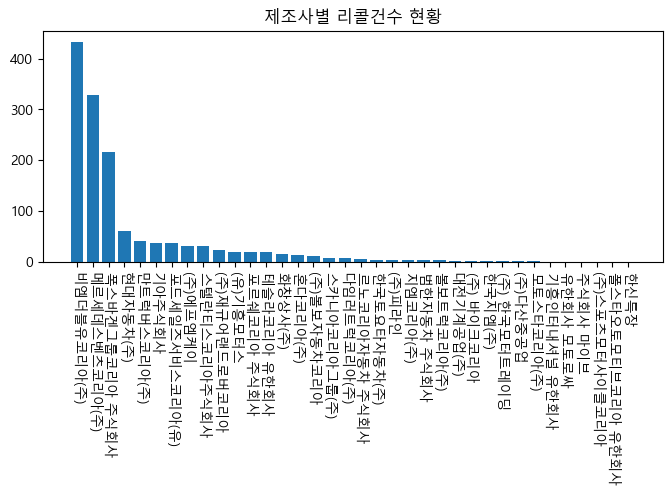

In [70]:
x = tmp.index
y = tmp['count'] 
plt.figure(figsize=(8,3))         # 스케치북 그리고
plt.bar(x=x,height=y)             # bar 차트에 x, y 값 할당
plt.xticks(rotation=270)          # x축 이름 회전
plt.title('제조사별 리콜건수 현황') # 차트 제목 쓰고
plt.show()                        # 출력해라

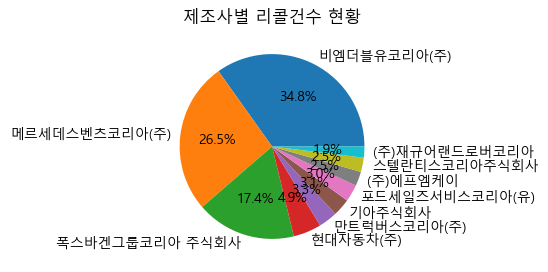

In [75]:
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count').head(10)

x = tmp.index
y = tmp['count'] 
plt.figure(figsize=(8,3))        
plt.pie(y, labels=x, autopct='%.1f%%') # 백분율을 소수점 아래 한 자리까지 표시하고, 마지막에 '%' 기호를 붙이는 형식               
plt.title('제조사별 리콜건수 현황') 
plt.show()                     

```
[분석결과]

2022년 한해 동안, 여전히 독3사의 리콜 건수가 가장 많은 것으로 보인다.

상위 10명의 제작자가 전체 리콜건수에서 어느 정도 비중을 차지하는지 확인할 수 있다.
```

### 3.2. 모델별 리콜 현황 출력

In [76]:
df.head()

,제작자,차명,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,혼다코리아(주),CBR1000RR-R,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5,2015,2,26,2022,1,5
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2011,2,28,2012,9,25,2022,1,5
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,12,19,2015,2,26,2022,1,5


차량 모델별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

In [77]:

tmp.head()

,count
제작자,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216
현대자동차(주),61
만트럭버스코리아(주),41


모델은 굉장히 많으므로, 상위 50개 모델만 뽑아서 시각화를 진행해보겠습니다.

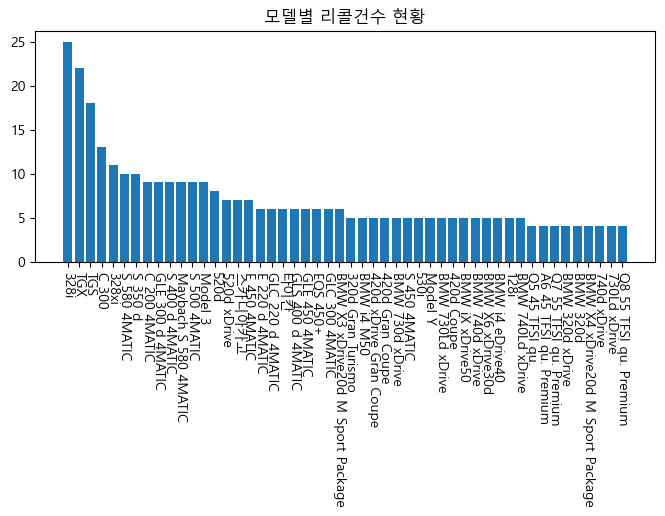

In [87]:
tmp = df.groupby('차명').size().sort_values(ascending=False).to_frame('count').head(50)

x = tmp.index
y = tmp['count'] 
plt.figure(figsize=(8,3))        
plt.bar(x=x,height=y)            
plt.xticks(rotation=270)         
plt.title('모델별 리콜건수 현황') 
plt.show()   

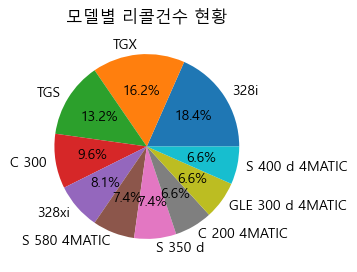

In [83]:
tmp = df.groupby('차명').size().sort_values(ascending=False).to_frame('count').head(10)

x = tmp.index
y = tmp['count'] 
plt.figure(figsize=(8,3))        
plt.pie(y, labels=x, autopct='%.1f%%') # 백분율을 소수점 아래 한 자리까지 표시하고, 마지막에 '%' 기호를 붙이는 형식               
plt.title('모델별 리콜건수 현황') 
plt.show()       

In [90]:
tmp.head()

,count
차명,
328i,25
TGX,22
TGS,18
C 300,13
328xi,11


```
2022년 가장 리콜이 많은 모델은? 328i
```

In [95]:
print(f'2022년 가장 리콜이 많은 모델은? {tmp.index[0]}')  # tmp 변수로 선택한 상위 50개의 모델 중에서 첫 번째 모델의 인덱스(모델명)를 나타냄

2022년 가장 리콜이 많은 모델은? 328i


```
tmp.reset_index => 기존의 인덱스는 새로운 열로 추가
reset_index() 메서드를 사용할 때 주의할 점은 기존의 인덱스는 새로운 열로 추가되며, 
기존 인덱스를 삭제하려면 drop=True 옵션을 사용해야 합니다. 
예를 들어, tmp.reset_index(drop=True)를 호출하면 기존 인덱스가 삭제되고, 새로운 정수 기본 인덱스가 설정됩니다.

```

### 3.3. 월별 리콜 현황 출력

월별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

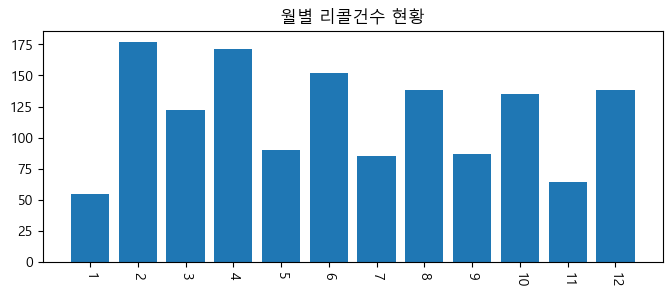

In [104]:
tmp = df.groupby('리콜_월').size().sort_values(ascending=False).to_frame('count')

x = tmp.index
y = tmp['count'] 
plt.figure(figsize=(8,3))        
plt.bar(x=x,height=y)            
plt.xticks(rotation=270, ticks=tmp.index)   
# ticks=tmp.index: 눈금의 위치를 설정합니다. 여기서 tmp.index는 x 축에 표시할 값들의 위치를 나타내며, 보통 이전에 계산한 데이터프레임의 인덱스 값을 사용      
plt.title('월별 리콜건수 현황') 
plt.show()  

### 3.4. 생산연도별 리콜 현황 출력

이번에는 생산연도별 리콜 현황을 꺾은선 그래프로 알아보겠습니다.

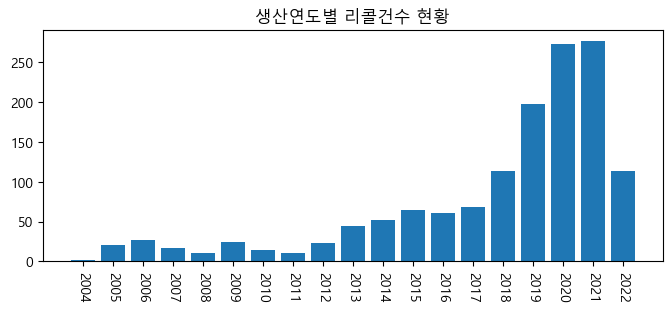

In [103]:
tmp = df.groupby('생산_년').size().sort_values(ascending=False).to_frame('count')

x = tmp.index
y = tmp['count'] 
plt.figure(figsize=(8,3))        
plt.bar(x=x,height=y)            
plt.xticks(rotation=270, ticks=tmp.index)         
plt.title('생산연도별 리콜건수 현황') 
plt.show()  

#### 퀴즈 1. 2022년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)를 구하세요.

In [105]:
tmp = df.groupby('리콜_월').size().to_frame('count')

tmp['count'].max()-tmp['count'].min()

122

### 3.5. 4분기 제조사별 리콜 현황 출력

가장 최근 데이터인 2022년 4분기(10, 11, 12월) 제조사별 리콜 현황을 시각화해봅시다.

In [113]:
df.loc[df['리콜_월']>=10, :]

,제작자,차명,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
1080,(주)에프엠케이,페라리Roma,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2020,1,1,2022,6,30,2022,10,4
1081,(주)에프엠케이,페라리F8Spider,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2020,1,1,2022,6,30,2022,10,4
1082,(주)에프엠케이,페라리F8Tributo,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2019,1,1,2022,6,30,2022,10,4
1083,(주)에프엠케이,페라리PortofinoM,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2021,1,1,2022,6,30,2022,10,4
1084,(주)에프엠케이,페라리Portofino,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2018,1,1,2020,12,31,2022,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2021,11,22,2022,10,24,2022,12,26
1415,비엠더블유코리아(주),BMW i4 eDrive40,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2021,11,23,2022,10,24,2022,12,26
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,2020,2,11,2022,4,29,2022,12,27
1417,화창상사(주),SPRINGFIELD,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,2019,10,28,2020,6,3,2022,12,27


```
첫 번째 [] 안에서 계산된 불리언(True/False) 값들은 데이터프레임의 행을 선택하기 위한 인덱스로 사용됩니다.
이렇게 선택된 행들은 다시 한 번 df[] 안에 포함되어 새로운 데이터프레임을 형성합니다. 
이 새로운 데이터프레임은 원본 데이터프레임에서 '리콜_월' 열의 값이 10 이상인 행들만을 포함하게 됩니다.
따라서 두 번 감싸는 이유는 데이터프레임을 필터링하여 원하는 조건을 충족하는 행들만을 선택하기 위함입니다.(True 값만 출력)
```

In [110]:
df_4 = df[df['리콜_월']>=10]
df_4.head()

,제작자,차명,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
1080,(주)에프엠케이,페라리Roma,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2020,1,1,2022,6,30,2022,10,4
1081,(주)에프엠케이,페라리F8Spider,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2020,1,1,2022,6,30,2022,10,4
1082,(주)에프엠케이,페라리F8Tributo,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2019,1,1,2022,6,30,2022,10,4
1083,(주)에프엠케이,페라리PortofinoM,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2021,1,1,2022,6,30,2022,10,4
1084,(주)에프엠케이,페라리Portofino,브레이크 오일 리저버 탱크 캡에서 대기압을 유지하기 위한 공기통로의 불량으로 브레이...,2018,1,1,2020,12,31,2022,10,4


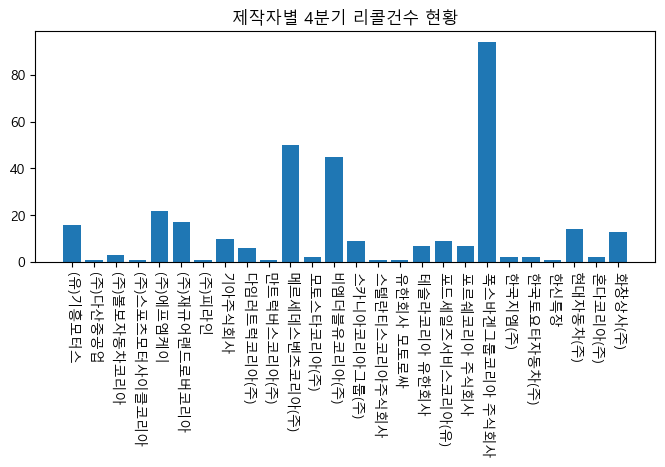

In [112]:
tmp = df_4.groupby('제작자').size().to_frame('count')

x = tmp.index
y = tmp['count'] 
plt.figure(figsize=(8,3))        
plt.bar(x=x,height=y)            
plt.xticks(rotation=270, ticks=tmp.index)         
plt.title('제작자별 4분기 리콜건수 현황') 
plt.show()  

### 3.6. 하반기 생산연도별 리콜 현황 출력

이번에는 2022년 하반기(7~12월)에 개시된 리콜 건들을 생산 개시 연도를 기준으로 시각화해봅시다.

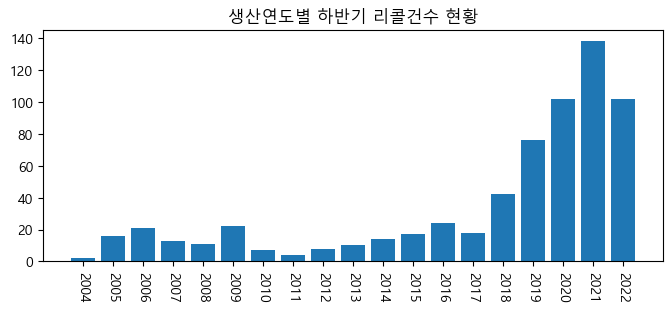

In [121]:
# a = (df['리콜_년'] == 2022) & (df['리콜_월']>=7)
a = df['리콜_월']>=7

tmp = df.loc[a].groupby('생산_년').size().to_frame('count')

x = tmp.index
y = tmp['count'] 
plt.figure(figsize=(8,3))        
plt.bar(x=x,height=y)            
plt.xticks(rotation=270, ticks=tmp.index)         
plt.title('생산연도별 하반기 리콜건수 현황') 
plt.show() 


### 3.7. 워드 클라우드를 이용한 리콜 사유 시각화

워드 클라우드를 이용하여 리콜 사유를 시각화해보도록 하겠습니다.

In [125]:
df.head()

,제작자,차명,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,혼다코리아(주),CBR1000RR-R,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5,2015,2,26,2022,1,5
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2011,2,28,2012,9,25,2022,1,5
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,12,19,2015,2,26,2022,1,5


In [123]:
# 워드 클라우드 생성을 도와주는 패키지를 가져옵니다.
from wordcloud import WordCloud, STOPWORDS

In [124]:
# 문법적인 성분들을 배제하기 위해 stopwords들을 따로 저장해둡니다.
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

영어를 사용할 때는 상관 없지만, 우리말을 쓸 때에는 적합하지 않습니다. 여기서는 예시로 몇 개의 stopwords들을 수기로 저장해보겠습니다.

In [126]:
# 손으로 직접 리콜 사유와 관련이 적은 문법적 어구들을 배제해보겠습니다.
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

In [127]:
df['리콜사유']

# 1. 중복 허용
# 2. 중복 제거

0       제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
2       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
3       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
4       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
                              ...                        
1414    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416    메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417    차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
1418    차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
Name: 리콜사유, Length: 1414, dtype: object

```
1. 리콜사유 추출
2. 리콜사유 한개의 문자열로 만들기
3. 한개의 문자열을 워드클라우드에 넣기
4. 중복 허용 vs 중복 제거 어느 방법이 맞는지 판단하기
```

In [143]:
# 1. 중복 허용
tlist = df['리콜사유'].values

text = ' '.join(tlist)

In [144]:
text

'제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되지 않아 라디에이터 내부 압력을 일정하게 유지할 수 없습니다. 이로 인해 라디에이터 내부 압력이 높아지면 냉각수 저장 탱크의 오버플로 튜브에서 냉각수가 분출될 수 있습니다. 특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 내 오일 압력 생성기(어큐뮬레이터)의 나사산이 날카롭게 가공되어, 사용 기간 중 어큐뮬레이터 하우징에 미세 균열이 발생하여 충분한 변속 압력 생성에 지장을 줄 가능성이 있습니다. 특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 내 오일 압력 생성기(어큐뮬레이터)의 나사산이 날카롭게 가공되어, 사용 기간 중 어큐뮬레이터 하우징에 미세 균열이 발생하여 충분한 변속 압력 생성에 지장을 줄 가능성이 있습니다. 특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 내 오일 압력 생성기(어큐뮬레이터)의 나사산이 날카롭게 가공되어, 사용 기간 중 어큐뮬레이터 하우징에 미세 균열이 발생하여 충분한 변속 압력 생성에 지장을 줄 가능성이 있습니다. 특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 내 오일 압력 생성기(어큐뮬레이터)의 나사산이 날카롭게 가공되어, 사용 기간 중 어큐뮬레이터 하우징에 미세 균열이 발생하여 충분한 변속 압력 생성에 지장을 줄 가능성이 있습니다. 특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 내 오일 압력 생성기(어큐뮬레이터)의 나사산이 날카롭게 가공되어, 사용 기간 중 어큐뮬레이터 하우징에 미세 균열이 발생하여 충분한 변속 압력 생성에 지장을 줄 가능성이 있습니다. 크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수 있습니다. 크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수 있습니다. 연료탱크 압력 센서의 고정 클립이 내

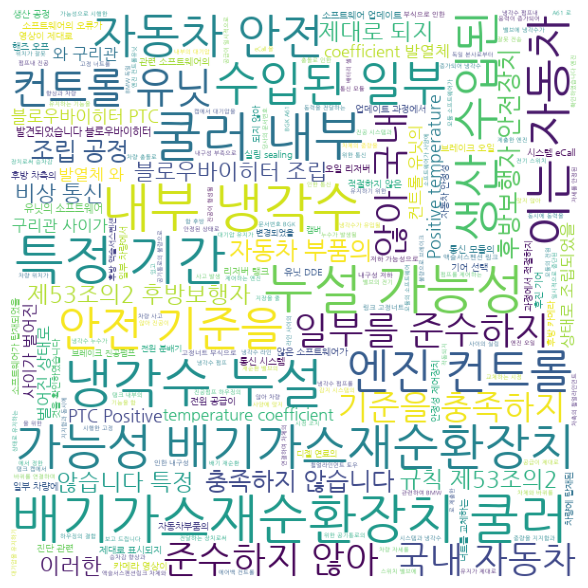

In [150]:
# 한글을 사용하기 위해서는 폰트를 지정해주어야 합니다.
font_path = './NanumGothic.ttf'

spwords = set(["성능과", "기준에", "관한", "동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=600, height=600)
wc1.generate(text)

plt.figure(figsize=(6, 6))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [153]:
# 2. 중복 제거
tlist = df['리콜사유'].drop_duplicates().values

text = ' '.join(tlist)

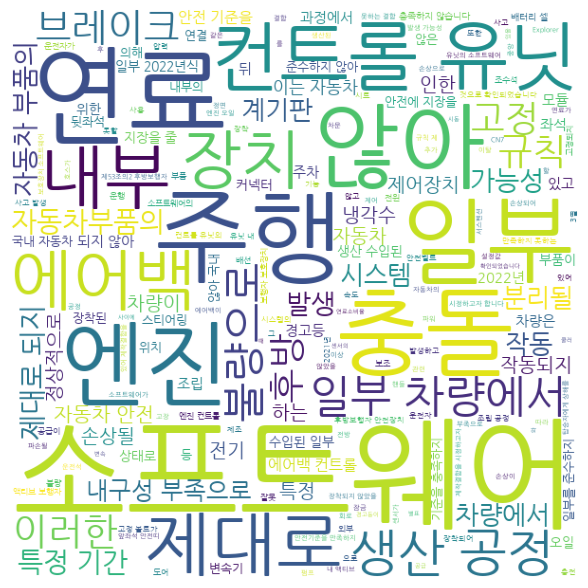

In [155]:
# 한글을 사용하기 위해서는 폰트를 지정해주어야 합니다.
font_path = './NanumGothic.ttf'

spwords = set(["차량", "성능과", "기준에", "관한", "동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=600, height=600)
wc1.generate(text)

plt.figure(figsize=(6, 6))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

워드 클라우드를 생성하고 시각화해보겠습니다.

In [132]:
# 예를 들어
tlist = ['안녕','메롱','문제야']
text = ' '.join(tlist)
text

'안녕 메롱 문제야'

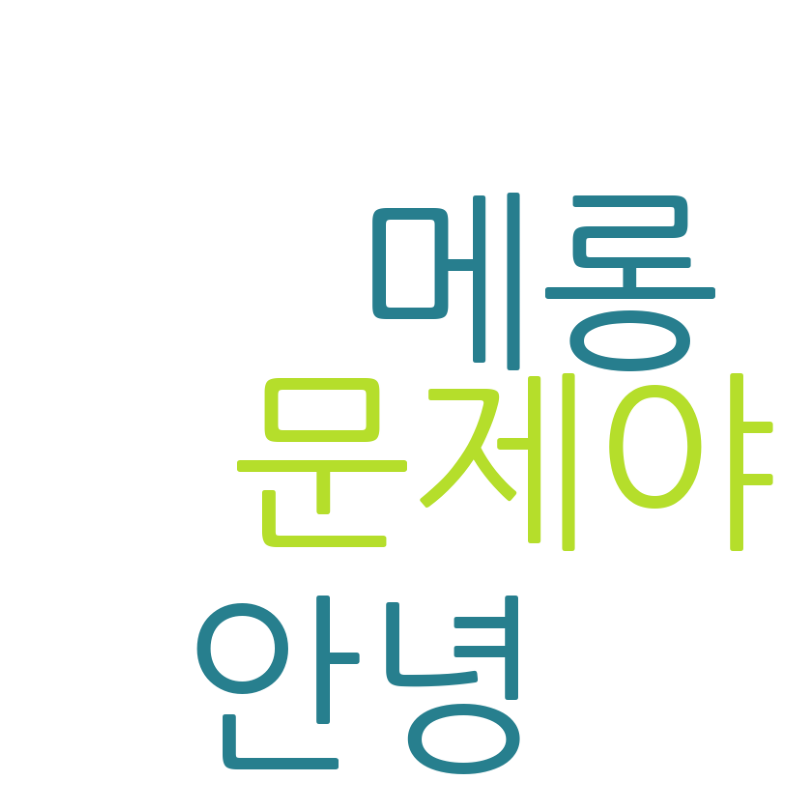

In [134]:
# 한글을 사용하기 위해서는 폰트를 지정해주어야 합니다.
pont_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=pont_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

#### 퀴즈 2. 기아자동차(주)의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명을 구하세요. 

In [156]:
df.head()

,제작자,차명,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,혼다코리아(주),CBR1000RR-R,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5,2015,2,26,2022,1,5
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2011,2,28,2012,9,25,2022,1,5
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,12,19,2015,2,26,2022,1,5


In [174]:
# 1.'기아'가 들어있는 행 추출
kia_df = df.loc[df['제작자'].str.contains('기아')]


In [178]:
# 2. 리콜개시일 중 최근이란 의미를 어떻게 연산하지?
recent_kia = kia_df.sort_values(by=['리콜_년', '리콜_월', '리콜_일'], ascending=False)

recent_kia.iloc[0,1]

'카니발'

In [179]:
recent_kia['차명'].head(1).values[0]

'카니발'